<center>
<img src="../../img/ods_stickers.jpg" />
</center> 
     
## <center>  [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

#### <center> Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko) 

# <center>Assignment #3. Spring 2019
## <center> Part 3. Gradient boosting

**In this assignment, you're asked to beat a baseline in the ["Flight delays" competition](https://www.kaggle.com/c/flight-delays-fall-2018).**

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/video](https://mlcourse.ai/video) 

### Your task is to:
 1. beat **"A3 baseline (8 credits)"** on Public LB (**0.73449** LB score)
 2. rename your [team](https://www.kaggle.com/c/flight-delays-fall-2018/team) in full accordance with the course rating
 
 This task is intended to be relatively easy. Here you are not required to upload your reproducible solution.
 
### <center> Deadline for A3: 2019 March 31, 20:59 GMT (London time)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import seaborn as sns
from catboost import CatBoostClassifier

Download data from the [competition page](https://www.kaggle.com/c/flight-delays-fall-2018/data) and change paths if needed.

In [2]:
train_df = pd.read_csv('../../data/flight_delays_train.csv')
test_df = pd.read_csv('../../data/flight_delays_test.csv')

In [ ]:
train_df.head()

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
test_df.head()

Given flight departure time, carrier's code, departure airport, destination location, and flight distance, you have to predict departure delay for more than 15 minutes. As the simplest benchmark, let's take logistic regression and two features that are easiest to take: DepTime and Distance. This will correspond to **"simple logit baseline"** on Public LB.

In [ ]:
X_train = train_df[['Distance', 'DepTime']].values 
y_train = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test_df[['Distance', 'DepTime']].values

X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

In [ ]:
logit_pipe = Pipeline([('scaler', StandardScaler()),
                       ('logit', LogisticRegression(C=1, random_state=17, solver='liblinear'))])

In [ ]:
logit_pipe.fit(X_train_part, y_train_part)
logit_valid_pred = logit_pipe.predict_proba(X_valid)[:, 1]

roc_auc_score(y_valid, logit_valid_pred)

In [ ]:
logit_pipe.fit(X_train, y_train)
logit_test_pred = logit_pipe.predict_proba(X_test)[:, 1]

pd.Series(logit_test_pred, 
          name='dep_delayed_15min').to_csv('logit_2feat.csv', 
                                           index_label='id', header=True)  # 0.68202

Now you have to beat **"A3 baseline (8 credits)"** on Public LB. It's not challenging at all. Go for LightGBM, maybe some other models (or ensembling) as well. Include categorical features, do some simple feature engineering as well. Good luck!

In [3]:
# Import libraries and set desired options
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import hstack
# !pip install eli5
import eli5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Ideas

### 

# Quick EDA

In [233]:
train_df = pd.read_csv('../../data/flight_delays_train.csv')
test_df = pd.read_csv('../../data/flight_delays_test.csv')

In [3]:
train_df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [4]:
test_df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1338.936600,723.13011
std,480.554102,563.22322
min,1.000000,31.00000
25%,928.000000,321.00000
50%,1329.000000,574.00000
75%,1733.000000,948.00000
max,2400.000000,4962.00000


In [5]:
train_df.isnull().sum(axis=0).sum() + test_df.isnull().sum(axis=0).sum()

0

In [234]:
test_df['split'] = 'test'
train_df['split'] = 'train'

In [254]:
all_df = pd.concat([train_df, test_df])

In [8]:
all_df.describe()

,DepTime,Distance
count,200000.000000,200000.000000
mean,1340.230240,726.263635
std,478.471381,568.955768
min,1.000000,30.000000
25%,930.000000,319.000000
50%,1329.000000,575.000000
75%,1733.000000,954.000000
max,2534.000000,4962.000000


In [9]:
test_df[test_df.DepTime > 2400]

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,split


In [10]:
all_df[all_df.DepTime > 2400].shape

(17, 10)

In [11]:
len(all_df[all_df.DepTime == 2400])

29

# Modeling

In [13]:
# 1. let's include categorical vars on catboost (re-do all below)

In [236]:
# extract hour and minute and remove deptime

def extraction_hour(a):
    size = len(str(a))
    if(a >= 2400):
        return 0 # we assume that over 24:00h, it is an outlier and it is replaced by 24h
    if size == 4: 
        return int(str(a)[:2])
    elif(size == 3):
        return int(str(a)[:1])
    else:
        return 0
    
def extraction_minutes(a):
    size = len(str(a))
    
    if size == 4: 
        return int(str(a)[2:4])
    elif(size == 3):
        return int(str(a)[1:3])
    elif(size == 2):
        return int(str(a)[0:2])
    else:
        return int(str(a)[0])

def time_features(df):
    df['DepHour'] = df.DepTime.apply(extraction_hour)
    df['DepMinute'] = df.DepTime.apply(extraction_minutes)
    return df#.drop(['DepTime'], axis=1)
    

In [237]:
# Preprocessing

from sklearn import preprocessing

def datetime_features_to_int(df):
    df.Month = df.Month.apply(lambda e: int(e.split("-")[1]))
    df.DayofMonth = df.DayofMonth.apply(lambda e: int(e.split("-")[1]))
    df.DayOfWeek = df.DayOfWeek.apply(lambda e: int(e.split("-")[1]))
    df['isWeekend'] = pd.Series([1 if (x > 5) & (x < 2) else 0 for x in df.DayOfWeek])
    date_strings = '2018-' + df['Month'].map(str) + "-" + df['DayofMonth'].map(str)
    df['dayOfYear'] = pd.to_datetime(date_strings).dt.dayofyear #apply(lambda x: x.strftime('%Y-%m-%d'))
    return df

def label_encode(df): ## APPLY ON BOTH DATASETS (TRAIN, TEST) !!!
    #pure_categorical = ['UniqueCarrier', 'Origin', 'Dest']
    cols_to_encode = np.where((df.dtypes == np.object) & (df.columns.values != 'split'))[0]
    df.iloc[:, cols_to_encode] = df.iloc[:, cols_to_encode].apply(preprocessing.LabelEncoder().fit_transform)
    return (df, cols_to_encode)

def order_and_concat(x):
    l = [str(x.Origin), str(x.Dest)]
    l.sort()
    return '-'.join(l)

def agg_target_stats_by_feat(df, grouping, objective, function, fname):
    new_feat = fname + '_' + str(objective) + '_per_' + str(grouping)
    df[new_feat] = df.groupby(grouping)[objective].transform(function)    
    return df

def categorical_combinations(df):
    df['traject'] = df.apply(lambda x: '%s-%s' % (x['Origin'], x['Dest']), axis=1)
    df['sorted_traject'] = df.apply(order_and_concat, axis=1)
    df['alike_trajects_per_carrier'] = df.groupby('UniqueCarrier').traject.transform(pd.Series.nunique)    
    
    # Unique carrier + origin/dest
    df['Carrier_Origin'] = df.apply(lambda x: '%s-%s' % (x['UniqueCarrier'], x['Origin']), axis=1)
    df['Carrier_Dest'] = df.apply(lambda x: '%s-%s' % (x['UniqueCarrier'], x['Dest']), axis=1)
    df['Carrier_Traject'] = df.apply(lambda x: '%s-%s' % (x['UniqueCarrier'], x['traject']), axis=1)
    
    return df
    

In [255]:
# Add information from 3rd-party datasets

airports = pd.read_csv('/home/sramirez/Descargas/airports.csv')
subset_airport = airports[['iata_code', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'iso_region', 'iso_country']]
all_df = pd.merge(all_df, subset_airport, how='left', left_on='Dest', right_on='iata_code')\
    .drop(['iata_code'], axis=1).replace(np.nan, 'UNKNOWN')
print(all_df.isnull().sum(axis=1).sum())
all_df.head()  

0


,DayOfWeek,DayofMonth,DepTime,Dest,Distance,Month,Origin,UniqueCarrier,dep_delayed_15min,split,latitude_deg,longitude_deg,elevation_ft,iso_region,iso_country
0,c-7,c-21,1934,DFW,732,c-8,ATL,AA,N,train,32.8968,-97.038,607,US-TX,US
1,c-3,c-20,1548,MCO,834,c-4,PIT,US,N,train,28.4294,-81.309,96,US-FL,US
2,c-5,c-2,1422,CLE,416,c-9,RDU,XE,N,train,41.4117,-81.8498,791,US-OH,US
3,c-6,c-25,1015,MEM,872,c-11,DEN,OO,N,train,35.0424,-89.9767,341,US-TN,US
4,c-6,c-7,1828,OMA,423,c-10,MDW,WN,Y,train,41.3032,-95.8941,984,US-NE,US


In [261]:
df = all_df.drop(['dep_delayed_15min'], axis=1).copy()
cols_to_encode = np.where((df.dtypes == np.object) & (df.columns.values != 'split'))[0]
print(cols_to_encode)
print(df.columns[cols_to_encode])
df.columns[cols_to_encode]
df.iloc[:, cols_to_encode].apply(preprocessing.LabelEncoder().fit_transform)


[ 0  1  3  5  6  7  9 10 11 12 13]
Index(['DayOfWeek', 'DayofMonth', 'Dest', 'Month', 'Origin', 'UniqueCarrier',
       'latitude_deg', 'longitude_deg', 'elevation_ft', 'iso_region',
       'iso_country'],
      dtype='object')


TypeError: ("'<' not supported between instances of 'str' and 'float'", 'occurred at index latitude_deg')

In [225]:
%%time

# More feature engineering (ON both training and test)


X = all_df.drop(['dep_delayed_15min'], axis=1).copy()
X = time_features(X)
X = datetime_features_to_int(X)
X = categorical_combinations(X)


for fname, function in [('std', np.std), ('mean', np.mean), ('mode', lambda x: pd.Series.mode(x)[0])]: # median
    for grouping in ['Dest', 'Origin', 'traject', 'Carrier_Dest', 'Carrier_Traject']: # sorted_traject (overfitting)
        for objective in ['DepTime', 'Distance', 'DepHour']: # dayofyear (overfitting)
            X = agg_target_stats_by_feat(X, grouping, objective, function, fname)
        
# lastly
(X, categorical_indices) = label_encode(X)

TypeError: ("'<' not supported between instances of 'str' and 'float'", 'occurred at index iso_region')

In [226]:
# split train and test
X_train = X[X.split == 'train'].drop(['split'], axis=1)
X_test = X[X.split == 'test'].drop(['split'], axis=1)
y_train = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values


In [92]:
X.columns[categorical_indices]

Index(['Dest', 'Origin', 'UniqueCarrier', 'traject', 'sorted_traject',
       'Carrier_Origin', 'Carrier_Dest', 'Carrier_Traject'],
      dtype='object')

In [72]:
X_train.head()

,DayOfWeek,DayofMonth,DepTime,Dest,Distance,Month,Origin,UniqueCarrier,DepHour,DepMinute,...,mode_DepTime_per_Dest,mode_Distance_per_Dest,mode_DepTime_per_Origin,mode_Distance_per_Origin,mode_DepTime_per_traject,mode_Distance_per_traject,mode_DepTime_per_Carrier_Dest,mode_Distance_per_Carrier_Dest,mode_DepTime_per_Carrier_Traject,mode_Distance_per_Carrier_Traject
0,6,20,1055,82,598,7,19,1,19,34,...,6,215,77,220,138,598,30,371,154,598
1,2,19,829,180,680,3,226,19,15,48,...,22,161,44,164,508,680,178,309,202,680
2,4,1,743,62,313,8,239,21,14,22,...,13,129,58,165,118,313,58,185,154,313
3,5,24,496,184,712,10,81,16,10,15,...,11,137,81,203,337,712,270,327,374,712
4,5,6,989,210,320,9,182,20,18,28,...,51,165,60,199,606,320,497,274,655,320


In [73]:
X.describe()

,DayOfWeek,DayofMonth,DepTime,Dest,Distance,Month,Origin,UniqueCarrier,DepHour,DepMinute,...,mode_DepTime_per_Dest,mode_Distance_per_Dest,mode_DepTime_per_Origin,mode_Distance_per_Origin,mode_DepTime_per_traject,mode_Distance_per_traject,mode_DepTime_per_Carrier_Dest,mode_Distance_per_Carrier_Dest,mode_DepTime_per_Carrier_Traject,mode_Distance_per_Carrier_Traject
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000
mean,2.942155,14.702585,697.516395,149.993455,520.989655,5.530710,149.836020,12.970740,13.099795,29.695740,...,50.818795,148.470545,80.518445,154.738250,312.093135,520.989655,173.48690,341.162890,361.947045,520.989655
std,1.991469,8.792117,285.733690,80.852928,356.595657,3.415164,80.778194,6.804142,4.793559,17.691829,...,58.695263,61.204297,40.116412,62.296901,227.311399,356.595657,179.26527,220.904679,244.761884,356.595657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,451.000000,81.000000,222.000000,3.000000,81.000000,7.000000,9.000000,15.000000,...,9.000000,100.000000,53.000000,102.000000,136.000000,222.000000,47.00000,157.000000,173.000000,222.000000
50%,3.000000,15.000000,690.000000,159.000000,458.000000,6.000000,159.000000,14.000000,13.000000,30.000000,...,24.000000,150.000000,77.000000,161.000000,241.000000,458.000000,80.00000,294.000000,284.000000,458.000000
75%,5.000000,22.000000,934.000000,214.000000,777.000000,8.000000,214.000000,19.000000,17.000000,45.000000,...,69.000000,203.000000,106.000000,216.000000,439.000000,777.000000,237.00000,509.000000,486.000000,777.000000
max,6.000000,30.000000,1337.000000,306.000000,1389.000000,11.000000,306.000000,22.000000,23.000000,59.000000,...,228.000000,235.000000,172.000000,237.000000,965.000000,1389.000000,748.00000,873.000000,1115.000000,1389.000000


In [74]:
X.columns

Index(['DayOfWeek', 'DayofMonth', 'DepTime', 'Dest', 'Distance', 'Month',
       'Origin', 'UniqueCarrier', 'split', 'DepHour', 'DepMinute', 'isWeekend',
       'dayOfYear', 'traject', 'sorted_traject', 'alike_trajects_per_carrier',
       'Carrier_Origin', 'Carrier_Dest', 'Carrier_Traject',
       'std_DepTime_per_Dest', 'std_Distance_per_Dest',
       'std_DepTime_per_Origin', 'std_Distance_per_Origin',
       'std_DepTime_per_traject', 'std_Distance_per_traject',
       'std_DepTime_per_Carrier_Dest', 'std_Distance_per_Carrier_Dest',
       'std_DepTime_per_Carrier_Traject', 'std_Distance_per_Carrier_Traject',
       'mean_DepTime_per_Dest', 'mean_Distance_per_Dest',
       'mean_DepTime_per_Origin', 'mean_Distance_per_Origin',
       'mean_DepTime_per_traject', 'mean_Distance_per_traject',
       'mean_DepTime_per_Carrier_Dest', 'mean_Distance_per_Carrier_Dest',
       'mean_DepTime_per_Carrier_Traject', 'mean_Distance_per_Carrier_Traject',
       'mode_DepTime_per_Dest', 'mode_Dis

In [75]:
assert(X.DepHour.nunique() == 24)
assert(X.DepMinute.nunique() == 60)
assert(X.dayOfYear.nunique() == 365)

In [167]:
import lightgbm as lgb
split = StratifiedKFold(n_splits=10, random_state=17)
it_values = np.linspace(10, 150, 20)
eta_values = [0.01, 0.03, 0.05, 0.1]

categorical_lgb = X.columns[categorical_indices].values
print(categorical_lgb)   

hyperparams = {'max_depth': [10, 30], 'eta' : [0.03, 0.1], 'n_estimators' : [100, 250, 500], 'subsample' : [0.8], 'colsample_by_tree' : [0.8]}
hyperparams_single_bk = {'max_depth': [30], 'eta' : [0.03], 'n_estimators' : [500], 'subsample' : [1.0], 'colsample_by_tree' : [1.0]}
hyperparams_single = {'colsample_by_tree': [0.8], 'eta': [0.03], 'max_depth': [10], 'n_estimators': [500], 'subsample': [0.8]}
                                                   
cat_indexs = np.where(X_train.dtypes != np.float)[0]
hyperparams_empty = {}
hyperparams_cat = {'iterations': [50, 100, 200], 'learning_rate': [0.01]}
catmodel = CatBoostClassifier(#iterations=100, 
                           #depth=4, 
                           #learning_rate=1, 
    cat_features=cat_indexs, 
    eval_metric='AUC')
#lgbm_grid_searcher = GridSearchCV(estimator=catmodel, param_grid={}, scoring='roc_auc', n_jobs=4, cv=split, verbose=True)

lightmodel = lgb.LGBMClassifier(class_weight='balanced', random_state=17)
lgbm_grid_searcher = GridSearchCV(estimator=lightmodel, param_grid=hyperparams_single, scoring='roc_auc', n_jobs=4, cv=split, verbose=True)


['Dest' 'Origin' 'UniqueCarrier' 'traject' 'sorted_traject'
 'Carrier_Origin' 'Carrier_Dest' 'Carrier_Traject']


In [168]:
skipped_features = [x for x in X_train.columns if ('_sorted' in x) or ('_dayOfYear' in x)] # introduces overfitting
skipped_features

X_train_s = X_train.drop(skipped_features, axis=1)
X_train_s.columns

Index(['DayOfWeek', 'DayofMonth', 'DepTime', 'Dest', 'Distance', 'Month',
       'Origin', 'UniqueCarrier', 'DepHour', 'DepMinute', 'isWeekend',
       'dayOfYear', 'traject', 'sorted_traject', 'alike_trajects_per_carrier',
       'Carrier_Origin', 'Carrier_Dest', 'Carrier_Traject',
       'std_DepTime_per_Dest', 'std_Distance_per_Dest',
       'std_DepTime_per_Origin', 'std_Distance_per_Origin',
       'std_DepTime_per_traject', 'std_Distance_per_traject',
       'std_DepTime_per_Carrier_Dest', 'std_Distance_per_Carrier_Dest',
       'std_DepTime_per_Carrier_Traject', 'std_Distance_per_Carrier_Traject',
       'mean_DepTime_per_Dest', 'mean_Distance_per_Dest',
       'mean_DepTime_per_Origin', 'mean_Distance_per_Origin',
       'mean_DepTime_per_traject', 'mean_Distance_per_traject',
       'mean_DepTime_per_Carrier_Dest', 'mean_Distance_per_Carrier_Dest',
       'mean_DepTime_per_Carrier_Traject', 'mean_Distance_per_Carrier_Traject',
       'mode_DepTime_per_Dest', 'mode_Distance_per

In [169]:
%%time

#X_FS = SelectPercentile(chi2, percentile = 0.75).fit_transform(X_train_s, y_train)
lgbm_grid_searcher.fit(X_train_s, y_train)
#clf.fit(X_train_s, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.6min finished


CPU times: user 36.9 s, sys: 380 ms, total: 37.3 s
Wall time: 1min 48s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=17, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'colsample_by_tree': [0.8], 'eta': [0.03], 'max_depth': [10], 'n_estimators': [500], 'subsample': [0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [210]:
l = [(i1, i2) for i1, i2 in zip(lgbm_grid_searcher.best_estimator_.feature_importances_, X_train_s.columns.values)]
def getKey(pair):
    return pair[0]
s = sorted(l, key=getKey, reverse=True)
top_features = [x[1] for x in s[:30]]
print(top_features)

lgbm_grid_searcher.fit(X_train_s[top_features], y_train)

['Distance', 'DepTime', 'Dest', 'UniqueCarrier', 'DayofMonth', 'DepMinute', 'Month', 'Origin', 'DayOfWeek', 'DepHour']
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [211]:
lgbm_grid_searcher.cv_results_ # 0.7548 in test up to now

{'mean_fit_time': array([8.61213629]),
 'std_fit_time': array([0.72991422]),
 'mean_score_time': array([0.82517424]),
 'std_score_time': array([0.31310947]),
 'param_colsample_by_tree': masked_array(data=[0.8],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_eta': masked_array(data=[0.03],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_subsample': masked_array(data=[0.8],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'colsample_by_tree': 0.8,
   'eta': 0.03,
   'max_depth': 10,
   'n_estimators': 500,
   'subsample': 0.8}],
 'split0_test_score': array([0.7481674]),
 'split1_test_score': array([0.75895332]),
 'spl

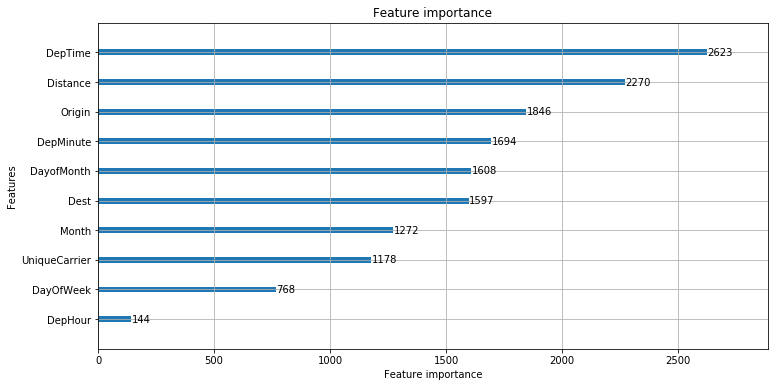

In [209]:
lgb.plot_importance(lgbm_grid_searcher.best_estimator_, max_num_features=100, figsize=(12,6))


In [126]:
test_pred = lgbm_grid_searcher.predict_proba(X_test)[:, 1]
pd.Series(test_pred, 
          name='dep_delayed_15min').to_csv('lgbm_traject_goodencoding.csv', 
                                           index_label='id', header=True)

In [173]:
final_model = lgb.LGBMClassifier(class_weight='balanced', random_state=17, max_depth=10, learning_rate=0.03, n_estimators=500, subsample=0.8, colsample_bytree=0.8).fit(X_train_s, y_train)

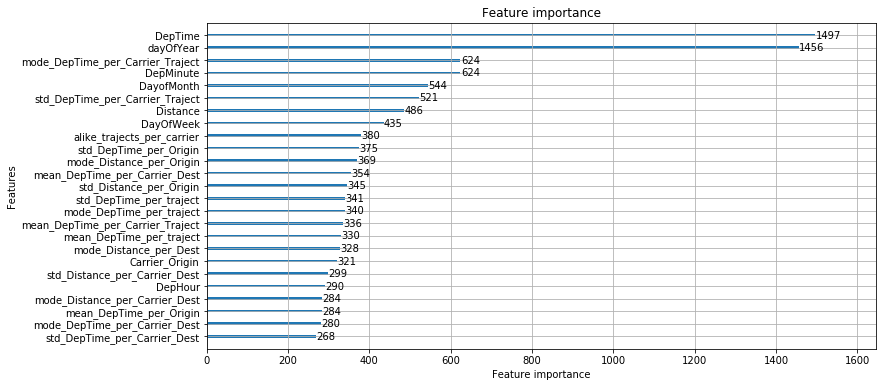

In [175]:
lgb.plot_importance(final_model, max_num_features=25, figsize=(12,6))

In [176]:
test_pred = final_model.predict_proba(X_test)[:, 1]
pd.Series(test_pred, 
          name='dep_delayed_15min').to_csv('lgbm_final_model.csv', 
                                           index_label='id', header=True)

### IDEAS

* add interacion objective: depHour for combinations
* add categorical combination: dayOfYear-Origin, or dest
* We may try add lag-1 even with different years
* Look for region for each airport in google
